In [1]:
%matplotlib notebook
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import qutip as q
from numpy import linalg as LA
import matplotlib.cm as cm
import sc_qubits2 as scq
import helpers as h
from tqdm import tqdm_notebook, trange
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import matplotlib.gridspec as gridspec
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

using std lib version of multiprocessing; consider installing pathos; it's much more robust


In [2]:
data           = np.load('Floquet_comp.npz')
EL             = data['EL']
InvT1_list     = data['InvT1']
gamma_phi_list = data['gamma_phi']
fenergies_list = data['fenergies']
phi_01         = data['phi_01']
aphi_list      = data['aphi_list']
dphi_list      = data['dphi_list']
w_0_list       = data['w_0_list']
w01            = data['w01']

<IPython.core.display.Javascript object>


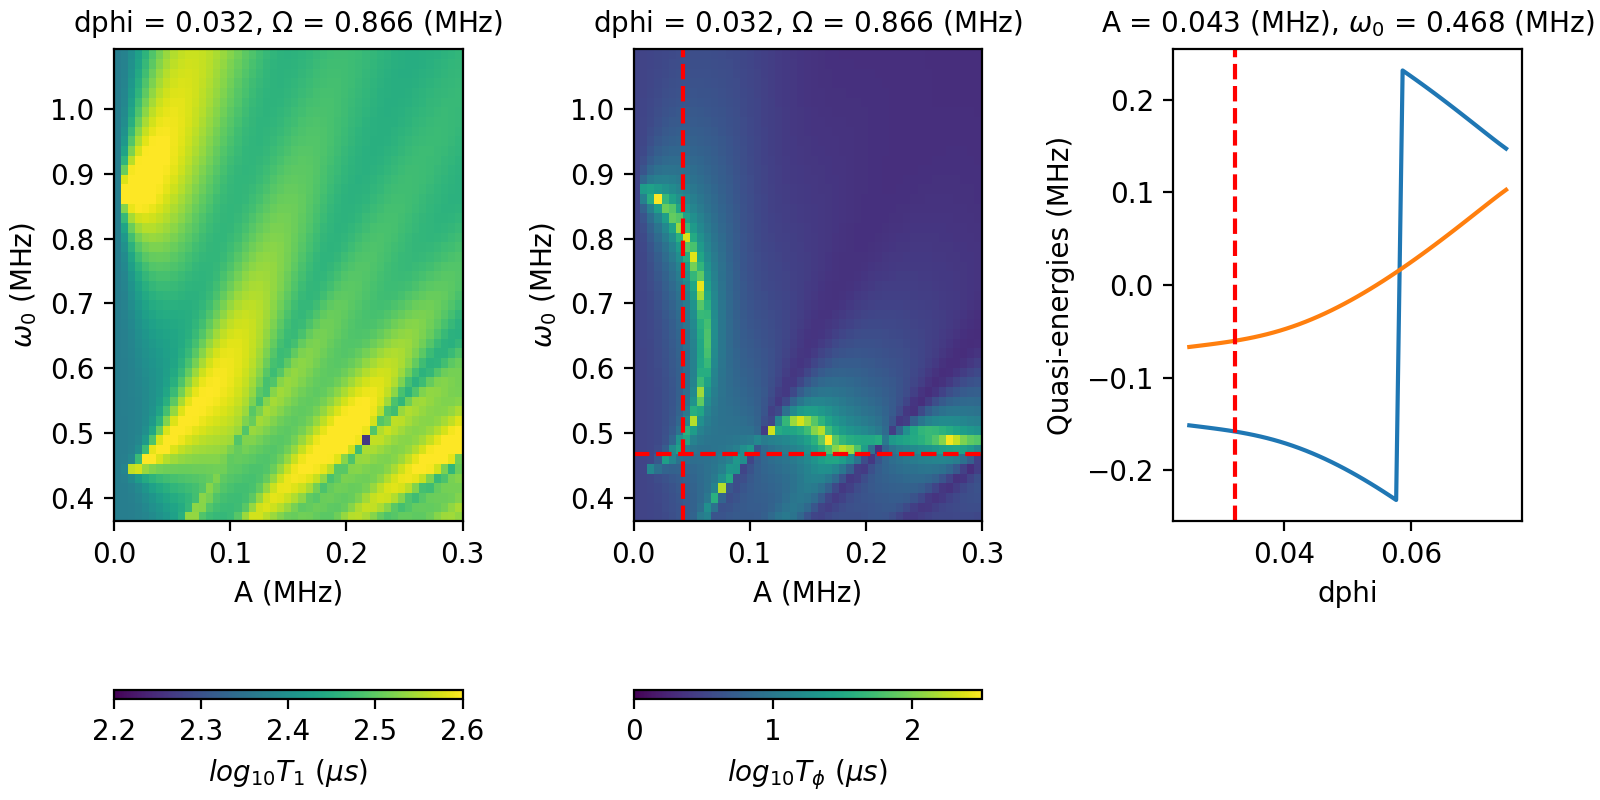

interactive(children=(IntSlider(value=7, continuous_update=False, description='Amp_idx:', max=49), IntSlider(v…

In [3]:
N_data = gamma_phi_list.shape[0]
N_dphi = gamma_phi_list.shape[2]
amp_slider = widgets.IntSlider(
            value=7,
            min=0,
            max=N_data-1,
            step=1,
            description='Amp_idx:',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d',
        )
w_slider = widgets.IntSlider(
            value=7,
            min=0,
            max=N_data-1,
            step=1,
            description='w_idx:',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d',
        )
dphi_slider = widgets.IntSlider(
            value=7,
            min=0,
            max=N_dphi-1,
            step=1,
            description='dphi_idx:',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d',
        )

fig2  = plt.figure(constrained_layout=True, figsize=(8,4))
spec2 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig2)
ax1 = fig2.add_subplot(spec2[0, 0])
ax2 = fig2.add_subplot(spec2[0, 1])
ax3 = fig2.add_subplot(spec2[0, 2])


def f(a_idx, w_idx, p_idx):
    
    B = phi_01*(EL) * dphi_list[p_idx] * 2*np.pi
    Omega = np.sqrt(w01**2+4*B**2)
    A = aphi_list[a_idx]
    w = w_0_list[w_idx]
    p = dphi_list[p_idx]
    
    ax2.clear()
    ax3.clear()
    ax1.axis([aphi_list.min(), aphi_list.max(), w_0_list.min(), w_0_list.max()])
    ax1.set_xlabel(r'A (MHz)', fontsize = 10)
    ax1.set_ylabel(r'$\omega_0$ (MHz)', fontsize = 10)

    ax2.axis([aphi_list.min(), aphi_list.max(), w_0_list.min(), w_0_list.max()])
    ax2.set_xlabel(r'A (MHz)', fontsize = 10)
    ax2.set_ylabel(r'$\omega_0$ (MHz)', fontsize = 10)

    ax3.set_ylabel('Quasi-energies (MHz)', fontsize = 10)
    ax3.set_xlabel('dphi', fontsize = 10)

    cf1 = ax1.pcolormesh(aphi_list, w_0_list, np.log(1/InvT1_list[:,:,p_idx]*10**6)/np.log(10),cmap = 'viridis',
                        vmin=2.2, vmax=2.6)
    ax1.set_title(r'dphi = %.3f, $\Omega$ = %.3f (MHz)'%(p, Omega), fontsize = 10)
    cb1 = fig2.colorbar(cf1, ax=ax1, label=r'$log_{10}T_1$ $(\mu s)$', orientation = 'horizontal', pad = 0.1)

    
    cf2 = ax2.pcolormesh(aphi_list, w_0_list, np.log(1/gamma_phi_list[:,:,p_idx]*10**6)/np.log(10),cmap = 'viridis',
                        vmin=0, vmax=2.5)
    
    ax2.set_title(r'dphi = %.3f, $\Omega$ = %.3f (MHz)'%(p, Omega), fontsize = 10)
    cb2 = fig2.colorbar(cf2, ax=ax2, label=r'$log_{10}T_\phi$ $(\mu s)$', orientation = 'horizontal', pad = 0.1)
    l1, = ax2.plot(aphi_list, np.ones(N_data)*w, '--r')
    l2, = ax2.plot(np.ones(N_data)*A, w_0_list, '--r')
    
    ax3.plot(dphi_list, fenergies_list[w_idx,a_idx,:,:],'-')
    ax3.set_title(r'A = %.3f (MHz), $\omega_0$ = %.3f (MHz)'%(A, w), fontsize = 10)
    ax3.axvline(x=p, linestyle='--', color='r')
    return

interact(f, a_idx=amp_slider, w_idx=w_slider, p_idx = dphi_slider);

50